# Pretrage nad lavirintom

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import lavirint
from lavirint import Lavirint
from lavirint import LavirintEditor
from lavirint import LavirintAnimacija


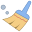
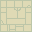
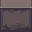
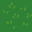
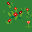
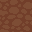
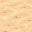
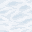
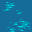
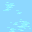
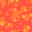
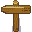
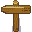
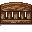
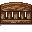
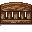
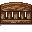
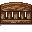
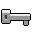
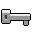
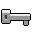
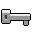
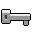
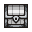
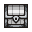
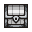
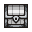
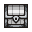
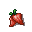
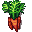

In [2]:
editor = LavirintEditor("slike")
editor.otvori_novi(sirina=20, visina=20)


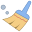
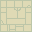
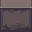
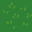
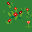
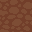
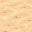
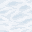
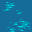
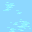
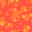
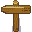
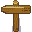
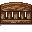
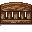
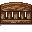
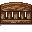
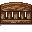
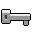
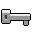
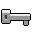
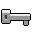
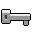
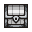
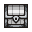
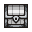
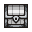
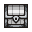
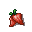
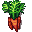

In [3]:
editor.ucitaj_postojeci("lavirinti/lavirint.json")

## Ucitavanje lavirinta

In [4]:
lavirint = Lavirint("lavirinti/lavirint.json")

## Stanje


In [5]:
class Stanje:
    def __init__(self, prethodno, polje, x, y, cena=1):
        self.prethodno = prethodno
        self.polje = polje
        self.x = x
        self.y = y
        self.cena = cena
    
    def to_dict(self, rekurzivno=False):
        stanje = {
            "polje": self.polje,
            "x": self.x,
            "y": self.y,
            "prethodno": None,
            "cena": self.cena
        }
        if rekurzivno and self.prethodno is not None:
            stanje["prethodno"] = self.prethodno.to_dict(rekurzivno)
        elif self.prethodno is not None:
            stanje["prethodno"] = {"x": self.prethodno.x, "y": self.prethodno.y, "cena": self.prethodno.cena}
        return stanje
    
    def __eq__(self, other):
        return hash(self) == hash(other)
    
    def __repr__(self):
        return "{} {} {} {} {}".format(self.x, self.y, self.polje["podloga"], self.polje["objekat"], self.cena)
    
    def __hash__(self):
        p1x = -1
        p1y = -1
        if self.prethodno is not None:
            p1x = self.prethodno.x
            p1y = self.prethodno.y
        return hash((self.x, self.y, p1x, p1y))

## Pocetni cvor


In [6]:
pocetno = random.choice(lavirint.dobavi_sa_objektom("pocetak"))
pocetno_stanje = Stanje(None, lavirint.dobavi_polje(*pocetno), *pocetno)

## Dobavljanje sljedecih stanja

In [7]:
neprohodne_podloge = {"zid"}




def sledeca_stanja(stanje, lavirint):
    nova_stanja = []
    p1x = -1
    p1y = -1
    if stanje.prethodno is not None:
        p1x = stanje.prethodno.x
        p1y = stanje.prethodno.y
    if stanje.x+1 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"] not in neprohodne_podloge and (stanje.x+1 != p1x or stanje.y != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y), stanje.x+1, stanje.y))
    if stanje.x+2 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+2, stanje.y)["podloga"] not in neprohodne_podloge and (stanje.x+2 != p1x or stanje.y != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+2, stanje.y), stanje.x+2, stanje.y))
    if stanje.x-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"] not in neprohodne_podloge and (stanje.x-1 != p1x or stanje.y != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y), stanje.x-1, stanje.y))
    if stanje.x-2 >= 0 and lavirint.dobavi_polje(stanje.x-2, stanje.y)["podloga"] not in neprohodne_podloge and (stanje.x-2 != p1x or stanje.y != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-2, stanje.y), stanje.x-2, stanje.y))
    if stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"] not in neprohodne_podloge and (stanje.x != p1x or stanje.y+1 != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y+1), stanje.x, stanje.y+1))
    if stanje.y+2 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+2)["podloga"] not in neprohodne_podloge and (stanje.x != p1x or stanje.y+2 != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y+2), stanje.x, stanje.y+2))
    if stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"] not in neprohodne_podloge and (stanje.x != p1x or stanje.y-1 != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y-1), stanje.x, stanje.y-1))
    if stanje.y-2 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-2)["podloga"] not in neprohodne_podloge and (stanje.x != p1x or stanje.y-2 != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y-2), stanje.x, stanje.y-2))
    
    
    
    
    return nova_stanja

In [8]:
def ucs(lavirint, pocetno_stanje, cilj):
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if trenutno.polje["objekat"] == cilj:
            return (trenutno, poseceni_lista)
        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)


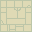
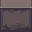
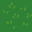
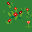
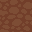
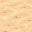
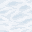
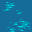
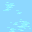
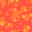
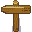
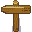
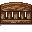
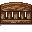
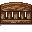
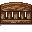
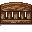
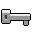
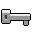
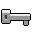
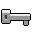
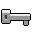
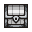
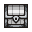
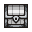
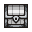
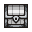
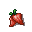
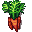

In [9]:
rezultat = ucs(lavirint, pocetno_stanje, "cilj")
animacija = LavirintAnimacija("slike", "lavirinti/lavirint.json", rezultat)
animacija.prikazi()

In [10]:
neprohodne_podloge = {"zid"}
def cena(lavirint, x, y):
    return recnik_cena.get(lavirint.dobavi_polje(x, y)["podloga"], 1)

recnik_cena = {
    "lava": 50,
    "trava": 0,
    "blato": 20
}

def sledeca_stanja(stanje, lavirint):
    nova_stanja = []
    bez_blata_x = 0
    bez_blata_y = 0
    p1x = -1
    p1y = -1
    if stanje.prethodno is not None:
        p1x = stanje.prethodno.x
        p1y = stanje.prethodno.y
    
    if stanje.x+1 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"] not in neprohodne_podloge and (stanje.x+1 != p1x or stanje.y != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y), stanje.x+1, stanje.y, cena(lavirint, stanje.x+1, stanje.y)))
    if stanje.x+2 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+2, stanje.y)["podloga"] not in neprohodne_podloge and (stanje.x+2 != p1x or stanje.y != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+2, stanje.y), stanje.x+2, stanje.y, cena(lavirint, stanje.x+2, stanje.y)))
    if stanje.x-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"] not in neprohodne_podloge and (stanje.x-1 != p1x or stanje.y != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y), stanje.x-1, stanje.y, cena(lavirint, stanje.x-1, stanje.y)))
    if stanje.x-2 >= 0 and lavirint.dobavi_polje(stanje.x-2, stanje.y)["podloga"] not in neprohodne_podloge and (stanje.x-2 != p1x or stanje.y != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-2, stanje.y), stanje.x-2, stanje.y, cena(lavirint, stanje.x-2, stanje.y)))
    if stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"] not in neprohodne_podloge and (stanje.x != p1x or stanje.y+1 != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y+1), stanje.x, stanje.y+1, cena(lavirint, stanje.x, stanje.y+1)))
    if stanje.y+2 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+2)["podloga"] not in neprohodne_podloge and (stanje.x != p1x or stanje.y+2 != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y+2), stanje.x, stanje.y+2, cena(lavirint, stanje.x, stanje.y+2)))
    if stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"] not in neprohodne_podloge and (stanje.x != p1x or stanje.y-1 != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y-1), stanje.x, stanje.y-1, cena(lavirint, stanje.x, stanje.y-1)))
    if stanje.y-2 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-2)["podloga"] not in neprohodne_podloge and (stanje.x != p1x or stanje.y-2 != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y-2), stanje.x, stanje.y-2, cena(lavirint, stanje.x, stanje.y-2)))
    
    
    
    return nova_stanja

In [11]:
def ucs_kovcezi(lavirint, pocetno_stanje):
    pokupljeni_kovcezi = []
    spisak_ciljeva = {"kovceg": 3}
    
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if trenutno.polje["objekat"] in spisak_ciljeva:
            if spisak_ciljeva[trenutno.polje["objekat"]] > 0:
                neposecen = True
                for pk in pokupljeni_kovcezi:
                    if pk.polje["objekat"] == trenutno.polje["objekat"] and pk.x == trenutno.x and pk.y == trenutno.y:
                        neposecen = False
                if neposecen:
                    pokupljeni_kovcezi.append(trenutno)
                    spisak_ciljeva[trenutno.polje["objekat"]] -= 1
                    poseceni = set()
        if spisak_ciljeva["kovceg"] == 0:
            return (pokupljeni_kovcezi[-1], poseceni_lista)
        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)


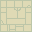
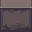
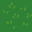
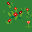
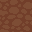
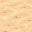
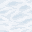
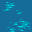
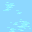
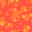
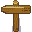
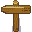
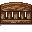
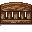
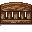
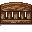
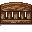
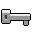
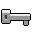
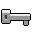
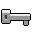
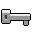
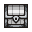
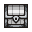
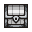
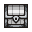
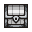
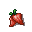
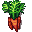

In [12]:
pronadjeni_kovcezi = ucs_kovcezi(lavirint, pocetno_stanje)
rezultat = ucs(lavirint, pronadjeni_kovcezi[0], "cilj")
rezultat2 = (rezultat[0], pronadjeni_kovcezi[1] + rezultat[1])
animacija = LavirintAnimacija("slike", "lavirinti/lavirint.json", rezultat)
animacija.prikazi()

In [13]:
def h(stanje, lavirint):
    # y = x2
    lava = lavirint.dobavi_sa_podlogom("lava")
    udaljenosti = []
    for l in lava:
        l_x = l[0]*l[0]
        l_y = l_x + 1
        udaljenosti.append(np.sqrt((l_x-stanje.x)**2 + (l_y - stanje.y)**2))
    
    return max(udaljenosti)


In [14]:
def ucs_navodi(lavirint, pocetno_stanje, cilj):
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if trenutno.polje["objekat"] == cilj:
            return (trenutno, poseceni_lista)
        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena + h(trenutno, lavirint)
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)

In [15]:
def a_zvezda(lavirint, pocetno_stanje, cilj):
    pokupljeni_kovcezi = []
    spisak_ciljeva = {"kovceg": 3}
    
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if trenutno.polje["objekat"] in spisak_ciljeva:
            if spisak_ciljeva[trenutno.polje["objekat"]] > 0:
                neposecen = True
                for pk in pokupljeni_kovcezi:
                    if pk.polje["objekat"] == trenutno.polje["objekat"] and pk.x == trenutno.x and pk.y == trenutno.y:
                        neposecen = False
                if neposecen:
                    pokupljeni_kovcezi.append(trenutno)
                    spisak_ciljeva[trenutno.polje["objekat"]] -= 1
                    poseceni = set()
        if spisak_ciljeva["kovceg"] == 0:
            
            return ucs_navodi(lavirint, pocetno_stanje, cilj)
            #return (pokupljeni_kovcezi[-1], poseceni_lista)
        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena + h(trenutno, lavirint)
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)


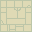
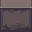
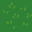
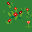
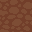
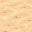
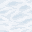
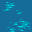
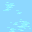
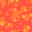
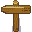
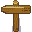
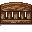
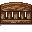
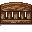
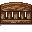
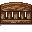
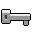
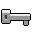
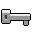
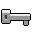
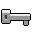
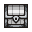
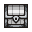
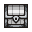
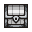
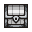
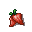
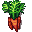

In [16]:
rezultat = a_zvezda(lavirint, pocetno_stanje, "cilj")
animacija = LavirintAnimacija("slike", "lavirinti/lavirint.json", rezultat)
animacija.prikazi()